In [1]:
import jupyterlab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy
import ipympl
import IPython
import ipywidgets
import pandas as pd
from tqdm.notebook import tqdm,trange
from scipy.stats import linregress
from scipy.optimize import curve_fit
%matplotlib widget

In [2]:
fn = r"C:\Users\bbtmr\Documents\UCONN\Jain Lab\Data analysis\Data\NTH046 and NTH050\NTH50A and 46B RH on Ch. 1 and 3, 10 K, 100 K, 200 K, 300 K, -3 to 3T.dat"
data = pd.read_csv(fn,encoding='cp1252',header=30)

# 50A (LSMO:TiO2) on Ch. 1 and 46B (LSMO/TiO2) on Ch. 3

In [3]:
data

,Comment,Time Stamp (sec),Status (code),Temperature (K),Magnetic Field (Oe),Sample Position (degrees),Bridge 1 Resistivity (Ohm),Bridge 1 Excitation (uA),Bridge 2 Resistivity (Ohm-m),Bridge 2 Excitation (uA),...,Bridge 4 Excitation (uA),Bridge 1 Std. Dev. (Ohm),Bridge 2 Std. Dev. (Ohm-m),Bridge 3 Std. Dev. (Ohm),Bridge 4 Std. Dev. (Ohm-m),Number of Readings,Bridge 1 Resistance (Ohms),Bridge 2 Resistance (Ohms),Bridge 3 Resistance (Ohms),Bridge 4 Resistance (Ohms)
0,NaN,8955937.219,NaN,9.994501,-29999.732734,6.260825e+22,443.448433,22.522193,NaN,NaN,...,NaN,0.180883,NaN,0.002846,NaN,25,443.448433,NaN,17.806191,NaN
1,NaN,8955957.453,NaN,9.999719,-29499.783750,6.260825e+22,443.198085,22.519093,NaN,NaN,...,NaN,0.131187,NaN,0.001181,NaN,25,443.198085,NaN,17.806528,NaN
2,NaN,8955976.813,NaN,9.999734,-28999.842578,6.260825e+22,443.082516,22.519093,NaN,NaN,...,NaN,0.083413,NaN,0.000728,NaN,25,443.082516,NaN,17.808077,NaN
3,NaN,8955995.688,NaN,9.999740,-28499.755469,6.260825e+22,443.175264,22.519093,NaN,NaN,...,NaN,0.065547,NaN,0.000866,NaN,25,443.175264,NaN,17.808866,NaN
4,NaN,8956015.219,NaN,9.999793,-27999.789688,6.260825e+22,443.289170,22.519093,NaN,NaN,...,NaN,0.059352,NaN,0.001173,NaN,25,443.289170,NaN,17.810624,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,NaN,8972099.500,NaN,299.989921,27999.660000,6.260825e+22,3698.774014,2.653666,NaN,NaN,...,NaN,0.498837,NaN,0.013736,NaN,25,3698.774014,NaN,189.335730,NaN
480,NaN,8972118.828,NaN,299.999474,28499.558047,6.260825e+22,3690.761699,2.653666,NaN,NaN,...,NaN,0.561472,NaN,0.018722,NaN,25,3690.761699,NaN,189.185379,NaN
481,NaN,8972138.203,NaN,299.981110,28999.685313,6.260825e+22,3681.585215,2.653666,NaN,NaN,...,NaN,0.600349,NaN,0.020214,NaN,25,3681.585215,NaN,189.027130,NaN
482,NaN,8972157.578,NaN,300.013160,29499.602813,6.260825e+22,3675.287734,2.653666,NaN,NaN,...,NaN,0.710392,NaN,0.029267,NaN,25,3675.287734,NaN,188.929381,NaN


In [4]:
temp_values = list(set(np.round(data['Temperature (K)'], decimals = 0)))

In [5]:
temp_values.sort()
temp_values = np.array(temp_values)
temp_values

array([ 10., 100., 200., 300.])

In [6]:
field_sweeps = [data[abs(data['Temperature (K)'] - temp) < 10] for temp in temp_values]

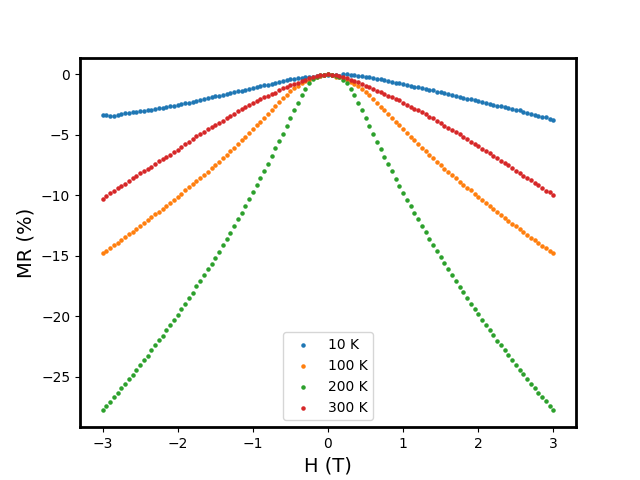

In [10]:
fig,ax = plt.subplots()

for idx in range(len(field_sweeps)):
    ax.scatter(field_sweeps[idx]['Magnetic Field (Oe)']/10000,100*(field_sweeps[idx]['Bridge 1 Resistance (Ohms)']/max(field_sweeps[idx]['Bridge 1 Resistance (Ohms)'])-1),label=f"{float(temp_values[idx]):1.0f} K", s=5)

ax.set_xlabel('H (T)',fontsize=14)
ax.set_ylabel('MR (%)',fontsize=14)
ax.legend()
for spine in ax.spines.values():
    spine.set_linewidth(2)

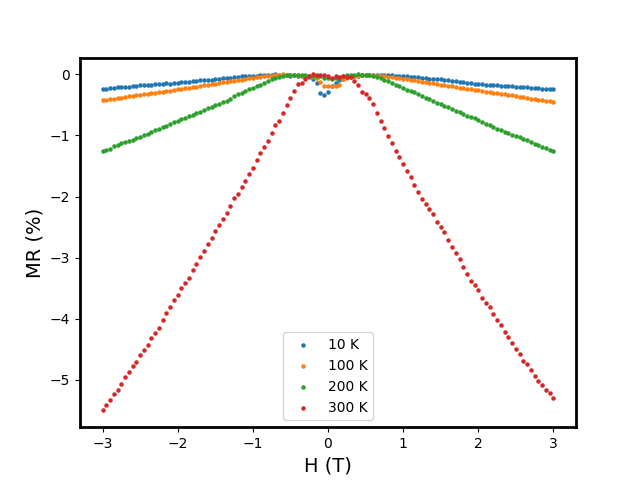

In [13]:
fig1,ax1 = plt.subplots()

for idx in range(len(field_sweeps)):
    ax1.scatter(field_sweeps[idx]['Magnetic Field (Oe)']/10000,100*(field_sweeps[idx]['Bridge 3 Resistance (Ohms)']/max(field_sweeps[idx]['Bridge 3 Resistance (Ohms)'])-1),label=f"{float(temp_values[idx]):1.0f} K", s=5)

ax1.set_xlabel('H (T)',fontsize=14)
ax1.set_ylabel('MR (%)',fontsize=14)
ax1.legend(loc = 'lower center')
for spine in ax1.spines.values():
    spine.set_linewidth(2)

In [9]:
# fig1.savefig(r'C:\Users\bbtmr\Documents\UCONN\Jain Lab\Data analysis\Data\Figures\MRS Fall 2024 figures\NTH034G -3 to 3 T at 10 K.png')
# fig2.savefig(r'C:\Users\bbtmr\Documents\UCONN\Jain Lab\Data analysis\Data\Figures\MRS Fall 2024 figures\MgO comp -3 to 3 T at 10 K')